In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('black_friday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.614570e+05,261457.000000,261457.000000,261457.000000,180464.000000,80112.000000,261457.000000
mean,1.002937e+06,8.084243,0.409127,5.291337,9.845642,12.657542,9318.187293
std,1.704408e+03,6.526384,0.491674,3.745210,5.086125,4.128797,4969.985184
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001449e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5863.000000
50%,1.002948e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004317e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12059.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             80993
Product_Category_3            181345
Purchase                           0
dtype: int64

In [9]:
null_percent = (data.isnull().sum()/len(data))*100
pd.DataFrame(null_percent[null_percent>0].apply(lambda x:"{:.2f}%".format(x)), columns=['Null %'])

,Null %
Product_Category_2,30.98%
Product_Category_3,69.36%


Only Product_Category_2 and Product_Category_3 have null values. Product_Category_3 is null for nearly 70% of transactions so it can't give us much information.

In [12]:
cat_describe = data[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                     'Marital_Status', 'Product_Category_1']].astype('object').describe()
cat_describe.loc['percent'] = 100*cat_describe.loc['freq'] / cat_describe.loc['count']

cat_describe

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1
count,261457,261457,261457,261457.000000,261457,261457.000000,261457.000000
unique,3507,2,7,21.000000,3,2.000000,18.000000
top,P00265242,M,26-35,4.000000,B,0.000000,5.000000
freq,840,197281,104244,34496.000000,110348,154488.000000,72488.000000
percent,0.321277,75.4545,39.8704,13.193757,42.205,59.087345,27.724635


### A basic observation is that:

* Product P00265242 is the most popular product.
* Most of the transactions were made by men.
* Age group with most transactions was 26-35.

### Feature Analysis

## Gender

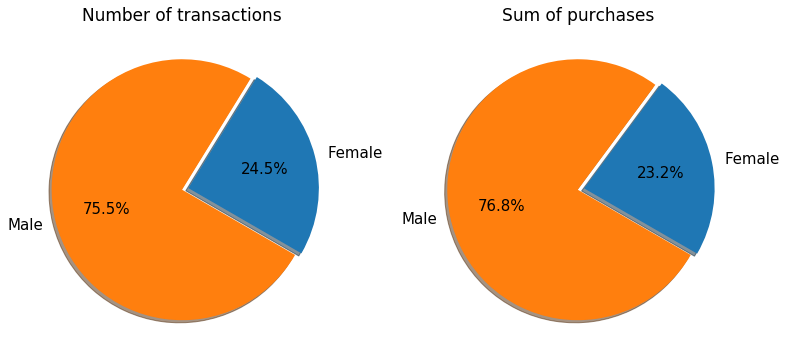

In [20]:
plt.figure(figsize=(13,6))
gender_df = data[['Gender', 'Purchase']].groupby('Gender').agg(['count', 'sum'])

params={'shadow':True,
       'explode': (0.05, 0),
       'textprops': {'fontsize':15},
       'startangle':-30,
       'labels':gender_df.index.map({'M':'Male', 'F':'Female'}),
       'autopct': '%1.1f%%'}

plt.subplot(121)
plt.pie(gender_df['Purchase']['count'], **params)
plt.title('Number of transactions', size=17)

plt.subplot(122)
plt.pie(gender_df['Purchase']['sum'], **params)
plt.title('Sum of purchases', size=17)
plt.show()

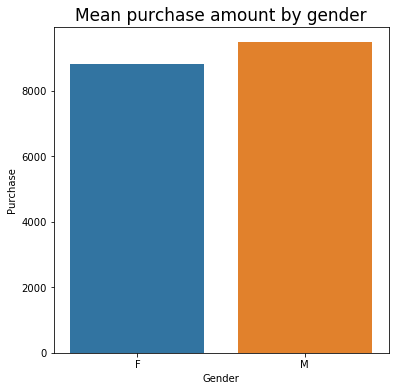

In [27]:
plt.figure(figsize=(6,6))
gender_df = data[['Gender', 'Purchase']].groupby('Gender', as_index=False).agg('mean')

sns.barplot(x='Gender', y='Purchase', data=gender_df)

plt.title('Mean purchase amount by gender', size=17)
plt.show()

## Age

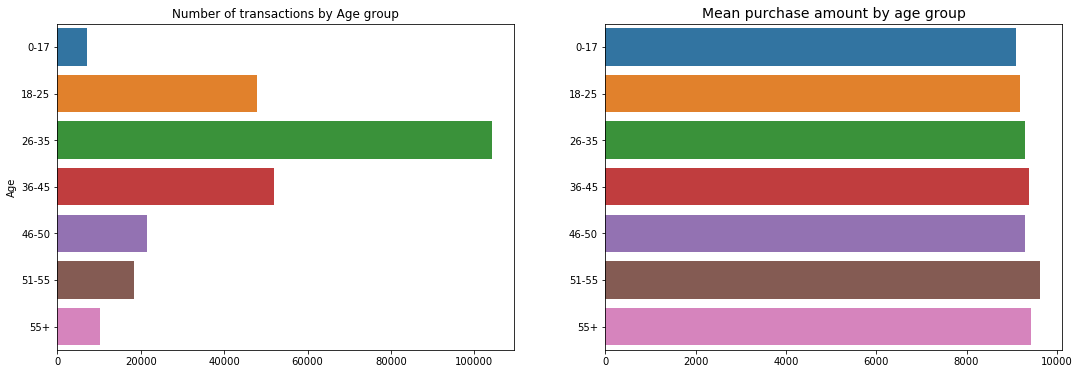

In [37]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(y='Age', data=data, order=sorted(data.Age.unique()))
plt.xlabel("")
plt.ylabel("Age")
plt.title("Number of transactions by Age group")

plt.subplot(122)
age_df = data[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_df, order=sorted(data.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

People within the ages of 26 to 35 have purchased the most (in number and amount), and as we saw about gender, people in different ages have nearly same mean purchase amount, too.

In [44]:
age_product = data[['Age', 'Product_ID', 'Purchase']].groupby(['Age', 'Product_ID']).agg('count').rename(columns={'Purchase':'count'})
age_product.sort_values('count', inplace=True, ascending=False)
ages = sorted(data.Age.unique())
result = pd.DataFrame({x:list(age_product.loc[x].index)[:5] for x in ages},
                     index = ['#{}'.format(x) for x in range(1,6)])
result

,0-17,18-25,26-35,36-45,46-50,51-55,55+
#1,P00255842,P00265242,P00265242,P00025442,P00025442,P00265242,P00265242
#2,P00000142,P00112142,P00025442,P00112142,P00117942,P00025442,P00051442
#3,P00034742,P00057642,P00110742,P00110742,P00184942,P00110742,P00025442
#4,P00112142,P00110742,P00057642,P00184942,P00051442,P00117942,P00184942
#5,P00025442,P00046742,P00112142,P00058042,P00034742,P00145042,P00058042


## Occupation

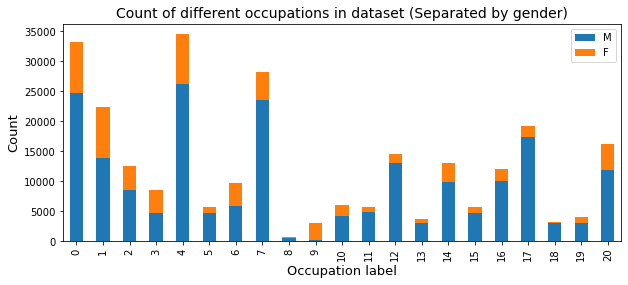

In [47]:
men = data[data.Gender=='M']['Occupation'].value_counts(sort=False)
women = data[data.Gender=='F']['Occupation'].value_counts(sort=False)
pd.DataFrame({'M':men, 'F':women}).plot.bar(stacked=True)
plt.gcf().set_size_inches(10,4)
plt.title("Count of different occupations in dataset (Separated by gender)", size=14)
plt.legend(loc="upper right")
plt.xlabel('Occupation label', size=13)
plt.ylabel('Count', size=13)
plt.show()

In [48]:
import random
color_mapping = {}

def random_color(val):
    if val in color_mapping.keys():
        color = color_mapping[val]
    else:
        r = lambda: random.randint(0,255)
        color = 'rgba({}, {}, {}, 0.4)'.format(r(), r(), r())
        color_mapping[val] = color
    return 'background-color: %s' % color

occ_product = data[['Occupation', 'Product_ID', 'Purchase']].groupby(['Occupation',
                                                                      'Product_ID']).agg('count').rename(columns={'Purchase':'count'})
occ_product.sort_values('count', inplace=True, ascending=False)
result = pd.DataFrame({
    x: list(occ_product.loc[x].index)[:5] for x in range(21)
}, index=['#{}'.format(x) for x in range(1,6)])
display(result.style.applymap(random_color))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
#1,P00110742,P00265242,P00265242,P00117942,P00265242,P00251242,P00025442,P00025442,P00242742,P00265242,P00145042,P00117942,P00112142,P00265242,P00265242,P00110742,P00265242,P00057642,P00010742,P00265242,P00058042
#2,P00265242,P00031042,P00025442,P00025442,P00112142,P00114942,P00058042,P00110942,P00112142,P00034742,P00000142,P00110942,P00025442,P00317842,P00184942,P00025442,P00117942,P00117942,P00057642,P00051442,P00278642
#3,P00046742,P00220442,P00058042,P00110742,P00025442,P00112542,P00184942,P00265242,P00201342,P00117442,P00112142,P00031042,P00057642,P00051442,P00278642,P00058042,P00034742,P00025442,P00080342,P00112142,P00110842
#4,P00057642,P00058042,P00059442,P00265242,P00184942,P00265242,P00265242,P00110742,P00028042,P00184942,P00237542,P00114042,P00242742,P00184942,P00005042,P00112142,P00025442,P00112142,P00265242,P00111142,P00148642
#5,P00112142,P00110742,P00102642,P00255842,P00110742,P00110742,P00034742,P00112142,P00001142,P00028842,P00255842,P00220442,P00255842,P00085242,P00117442,P00046742,P00046742,P00110742,P00058042,P00028842,P00145042


## City Category and City Stability

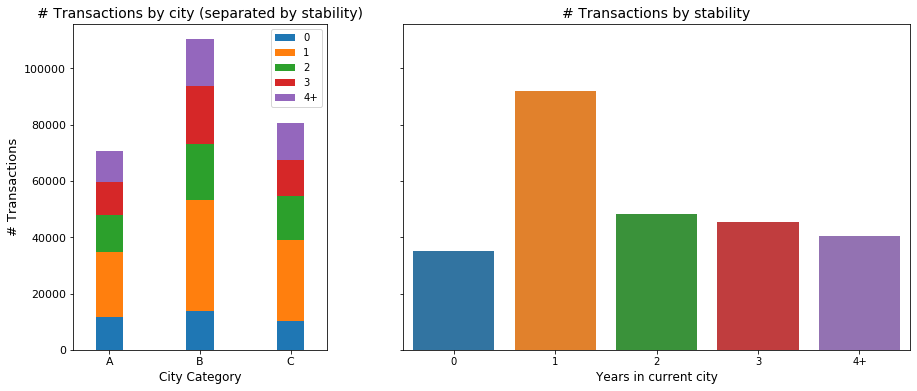

In [55]:
stay_years = [data[data.Stay_In_Current_City_Years == x]['City_Category'].value_counts(sort=False).iloc[::-1] for x in sorted(data.Stay_In_Current_City_Years.unique())]

years = sorted(data.Stay_In_Current_City_Years.unique())

f, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[1,2]}, sharey=True)

pd.DataFrame(stay_years, index=years).T.plot.bar(stacked=True, rot=0, fontsize=11, width=0.3, ax=ax1)
ax1.set_xlabel('City Category', size=12)
ax1.set_ylabel('# Transactions', size=13)
ax1.set_title('# Transactions by city (separated by stability)', size=14)

sns.countplot(x='Stay_In_Current_City_Years', data=data, order=years, ax=ax2)
ax2.set_xlabel('Years in current city', size=12)
ax2.set_ylabel('')
ax2.set_title('# Transactions by stability', size=14)

plt.gcf().set_size_inches(15,6)
plt.show()

People living in city category of B have had most transactions to this store, following by categories C and B with relatively close values. Those who have been in their living city for 1 year had double the number of transactions than any other stay durations, and then comes the people living in their city for 2 years, 3 years, 4+ years and 0 years (<1 year). The pattern is the same within each city category as well.
Seems like people living their second year in a city tend to shop more than others.

## Marital Status

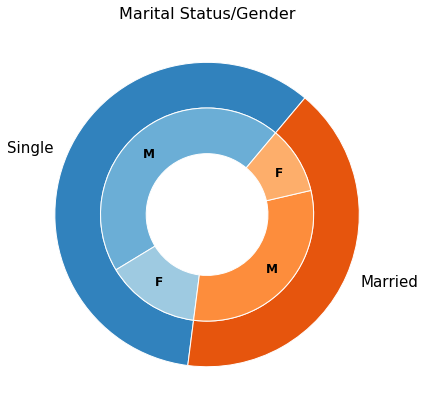

In [64]:
out_vals = data.Marital_Status.value_counts()
in_vals = np.array([data[data.Marital_Status==x]['Gender'].value_counts() for x in [0,1]]).flatten()

fig, ax = plt.subplots(figsize=(7,7))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1,2,5,6]))

ax.pie(out_vals, radius=1, colors=outer_colors, labels=['Single', 'Married'],
      startangle=50, textprops={'fontsize':15},
      wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(in_vals, radius=1-size, colors=inner_colors, labels=['M', 'F','M', 'F'],
      startangle=50, textprops={'fontsize':12, 'weight':'bold'},
      wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.75)

ax.set(aspect='equal')
plt.title('Marital Status/Gender', fontsize=16)
plt.show()

Single people have purchased more than married people and in both categories men, following the general pattern of dataset, have purchased more than women.

### Best sellers
Which products sold the most and which categories contain most-sold products? 

We will only use Product_Category_1 since the other two have alot of null values. Also, which users have purchased the most.

In [66]:
col_names = ['User_ID', 'Product_ID', 'Product_Category_1']
renames = ['User', 'Product', 'Category']
results = []
for col_name, new_name in zip(col_names, renames):
    group = data[[col_name, 'Purchase']].groupby(col_name, as_index=False).agg('count')
    result = group.sort_values('Purchase', ascending=False)[:10]
    result.index = ["#{}".format(x) for x in range(1,11)]
    results.append(result.rename(columns={col_name: new_name}))
    
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
        
    display_html(html_str.replace('table', 'table style="display:inline; padding-right: 3em !important;"'), raw=True)
    

display_side_by_side(*results)

,User,Purchase
#1,1001680,546
#2,1004277,440
#3,1001941,435
#4,1000889,429
#5,1001181,421
#6,1003618,379
#7,1000424,374
#8,1001449,372
#9,1001150,370
#10,1001015,361


## Building models

In [70]:
train = data.drop(['Product_Category_2', 'Product_Category_3'], axis=1)
train = train.rename(columns={'Product_ID': 'Product',
                              'User_ID': 'User',
                              'Product_Category_1': 'Category',
                              'City_Category': 'City',
                              'Stay_In_Current_City_Years': 'City_Stay'
                             })

y = train.pop('Purchase')

In [71]:
train.loc[:,'Gender'] = np.where(train['Gender'] == 'M', 1, 0)

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV

In [73]:
train.head()

,User,Product,Gender,Age,Occupation,City,City_Stay,Marital_Status,Category
0,1000001,P00069042,0,0-17,10,A,2,0,3
1,1000001,P00248942,0,0-17,10,A,2,0,1
2,1000001,P00087842,0,0-17,10,A,2,0,12
3,1000001,P00085442,0,0-17,10,A,2,0,12
4,1000002,P00285442,1,55+,16,C,4+,0,8


In [75]:
# Label Encoding ProductID and UserID

for col in ['User', 'Product']:
    train.loc[:, col] = LabelEncoder().fit_transform(train[col])
    
# One Hot Encoding other features
categoricals = ['Gender', 'Age', 'Occupation', 'City', 'City_Stay', 'Marital_Status', 'Category']
encoder = OneHotEncoder().fit(train[categoricals])
train = pd.concat([train, pd.DataFrame(encoder.transform(train[categoricals]).toarray(),
                                      index = train.index,
                                      columns = encoder.get_feature_names(categoricals))], axis=1)

train.drop(categoricals, axis=1, inplace=True)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train, y)

In [77]:
# Standardizing
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

params = {
    "n_estimators":[10, 30, 100],
    "max_depth": [3, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=3,
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print("Best params found: {}".format(grid_search.best_params_))
print("RMSE Score: {}".format(mean_squared_error(y_test, y_pred) ** 0.5))

Best params found: {'max_depth': 5, 'n_estimators': 100}
RMSE Score: 3486.3236835640523


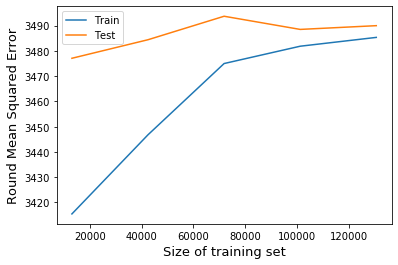

In [81]:
# plot learning curve to address possible under/over fitting
sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(**grid_search.best_params_), X_train, y_train, cv=3,
                                                  n_jobs=-1, scoring='neg_mean_squared_error')

train_scores = np.mean((-1*train_scores)**0.5, axis=1)
test_scores = np.mean((-1*test_scores)**0.5, axis=1)
sns.lineplot(sizes, train_scores, label='Train')
sns.lineplot(sizes, test_scores, label='Test')
plt.xlabel("Size of training set", size=13)
plt.ylabel("Round Mean Squared Error", size=13)
plt.show()

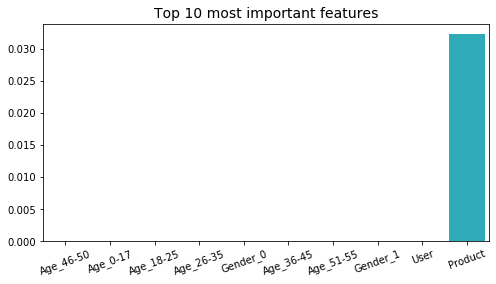

In [83]:
# features are more important to our model
model = grid_search.best_estimator_
impo = pd.Series(model.feature_importances_[:10], index=train.columns[:10]).sort_values()
impo_plot = sns.barplot(x=impo.index, y=impo.values)
plt.gcf().set_size_inches(8,4)
plt.xticks(rotation=20)
plt.title("Top 10 most important features", size=14)
plt.show()

Product_ID is having a significant impact on our model and we have User_ID in second place with sharp decrease.
We could predict purchase amount with a relatively small error (about half of the mean purchase value) but our model is highly relied on Product_ID and User_ID which means probably it won't perform as well for new products/users. Thus, it may not be a good model for predicting future sales for future customers and products but it can be used for other purposes like describing which products tend to be better options to advertise or to give vouchers for.


## Clustering (K-Means)

We can cluster our customers (User_IDs) based on products they have purchased and other features.
We need to change our features a little bit to be more suitable for clustering. Firstly, we are going to cluster users and not the transactions so we should group our transactions by User_ID and create our features based on that.
Now, what we know about each user, is his/her gender, living city, stay in current city years, age, marital status, occupation and products (s)he has bought. Let's exclude products he has bought and their categories for now, we will get to them later.

In terms of other features (gender, city, stay in city years, age, marital status and occupation) their values should all be the same in all rows for a particular User_ID but we assume there might be small noises and some of them may have wrong values in different rows, so we will take the mode value (one which is repeated the most) for each of them.
On the other hand, they are all nominal features so we will one hot encode them since there are not that much unique values.

In [91]:
train = data.drop(['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'], axis=1)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000001,F,0-17,10,A,2,0
2,1000001,F,0-17,10,A,2,0
3,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0


In [92]:
train = train.groupby('User_ID')

In [93]:
train = train.agg(lambda x: x.value_counts().index[-1])
feature_list = list(train.columns.values)
encoder = OneHotEncoder().fit(train[feature_list])
train = pd.concat([train, pd.DataFrame(encoder.transform(train[feature_list]).toarray(),
                                       index=train.index,
                                       columns=encoder.get_feature_names(feature_list))], axis=1)

train.drop(feature_list, axis=1, inplace=True)

In [94]:
train.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000003,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1000004,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1000005,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Now in regard to products, we can't add a column for each product and make it 1 if the user has bought it or 0 otherwise (due to huge number of products) so we'll do it for only top 100 products (by number of transactions).
Note that not only we know which user has bought which product, but we can also use purchase amounts as a metric for how much does this user likes/needs this product. We'll do the same thing for product categories but with all of them as features since there are no more than 18 categories.

So, in conclusion, we are going to find 100 most selling products and 18 categories (by number of transactions) and for each user, put purchase amount of this product/product category as a new feature for him, adding totally 118 new features to our data.

In [95]:
columns = ['Product_ID', 'Product_Category_1']
for col in columns:
    top_100 = data[col].value_counts().index[:100]
    user_purchase = pd.pivot_table(data[['User_ID', col, 'Purchase']],
                                  values = 'Purchase',
                                  index='User_ID',
                                  columns=col,
                                  aggfunc=np.sum).fillna(0)[top_100]
    train = train.join(user_purchase)

Note that we filled null values with 0 since they might be some NaN values (not all users have bought all top 100 products).
Let's also add total purchase amount for each user as a new feature:

In [96]:
train = train.join(data[['User_ID', 'Purchase']].groupby('User_ID').agg('sum'))
train.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,15,13,10,12,7,18,14,17,9,Purchase
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2479.0,0.0,0.0,11011.0,0.0,0.0,193613
1000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287920
1000003,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126469
1000004,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109269
1000005,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33210.0,0.0,0.0,0.0,0.0,344136


We standardize data in columns so features will have same scales in order to get clustered.

In [99]:
train_scaled = StandardScaler().fit_transform(train)

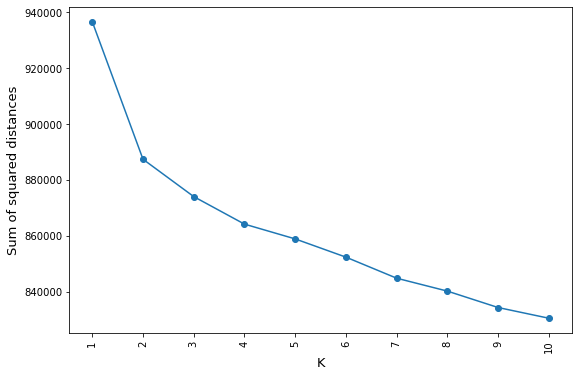

In [102]:
from sklearn.cluster import KMeans

k_values = np.arange(1,11)
models = []
dists = []

for k in k_values:
    model = KMeans(k).fit(train_scaled)
    models.append(model)
    dists.append(model.inertia_)
    
    
plt.figure(figsize=(9,6))
plt.plot(k_values, dists, 'o-')
plt.ylabel('Sum of squared distances', size=13)
plt.xlabel('K', size=13)
plt.xticks(k_values, rotation=90)
plt.show()

In [105]:
from sklearn.metrics import silhouette_score

model = models[2]
print("Silhouette score: {:.2f}".format(silhouette_score(train_scaled, model.predict(train_scaled))))

Silhouette score: 0.11
